In [242]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading Data

In [243]:
bnb_df = pd.read_csv('AB_NYC_2019.csv')

In [244]:
bnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [245]:
bnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [246]:
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [247]:
print(f'Number of rows: {bnb_df.shape[0]}')
print(f'Number of columns: {bnb_df.shape[1]}')

Number of rows: 48895
Number of columns: 16


## 1.1 Cleaning Data

In [248]:
drop_list = ['id', 'host_id', 'host_name', 'last_review', 'name', 'neighbourhood']

In [249]:
bnb_df.drop(drop_list, axis=1, inplace=True)

In [250]:
bnb_df.isna().sum()/bnb_df.shape[0]*100

neighbourhood_group                0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [251]:
# replace the missing values in 'reviews_per_month' with 0
bnb_df['reviews_per_month'].fillna(0, inplace=True)

/var/folders/cn/z9gkn6nx58gbgcpgjdrsx7xh0000gn/T/ipykernel_61814/2967768345.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bnb_df['reviews_per_month'].fillna(0, inplace=True)


In [252]:
bnb_df.isna().sum()/bnb_df.shape[0]*100

neighbourhood_group               0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

## 1.2 Statistics of the Data

In [253]:
bnb_df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
reviews_per_month,48895.0,1.090910,1.597283,0.00000,0.04000,0.37000,1.580000,58.50000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


In [254]:
bnb_df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

# 2. Exploratory Data Analysis

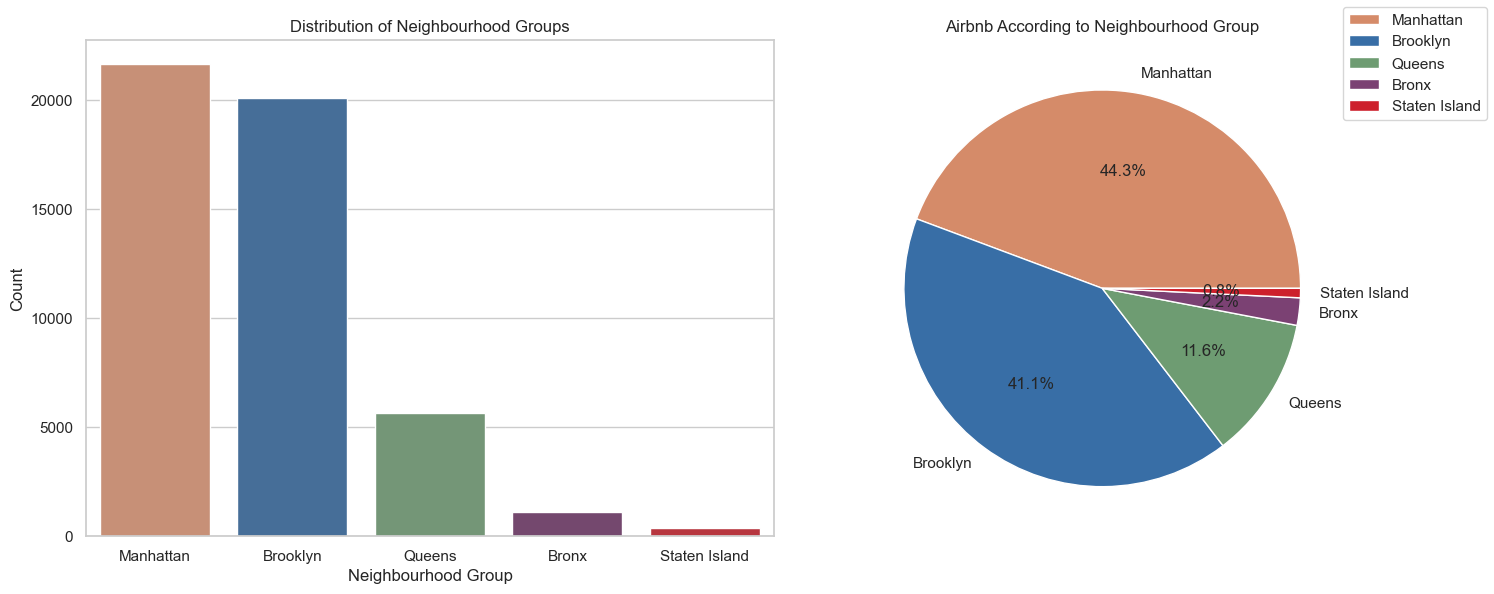

In [255]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

labels = bnb_df.neighbourhood_group.value_counts().index
colors = ['#D58B69','#386EA6','#6E9C72','#7B4173','#CD202C']
explode = [0,0,0,0,0]
sizes = bnb_df.neighbourhood_group.value_counts().values

sns.countplot(x='neighbourhood_group', hue='neighbourhood_group',order=labels, data=bnb_df, ax=ax1, palette=dict(zip(labels, colors)))
ax1.set_title('Distribution of Neighbourhood Groups')
ax1.set_xlabel('Neighbourhood Group')
ax1.set_ylabel('Count')

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
ax2.set_title('Airbnb According to Neighbourhood Group')

fig.legend()

plt.tight_layout()
plt.show()

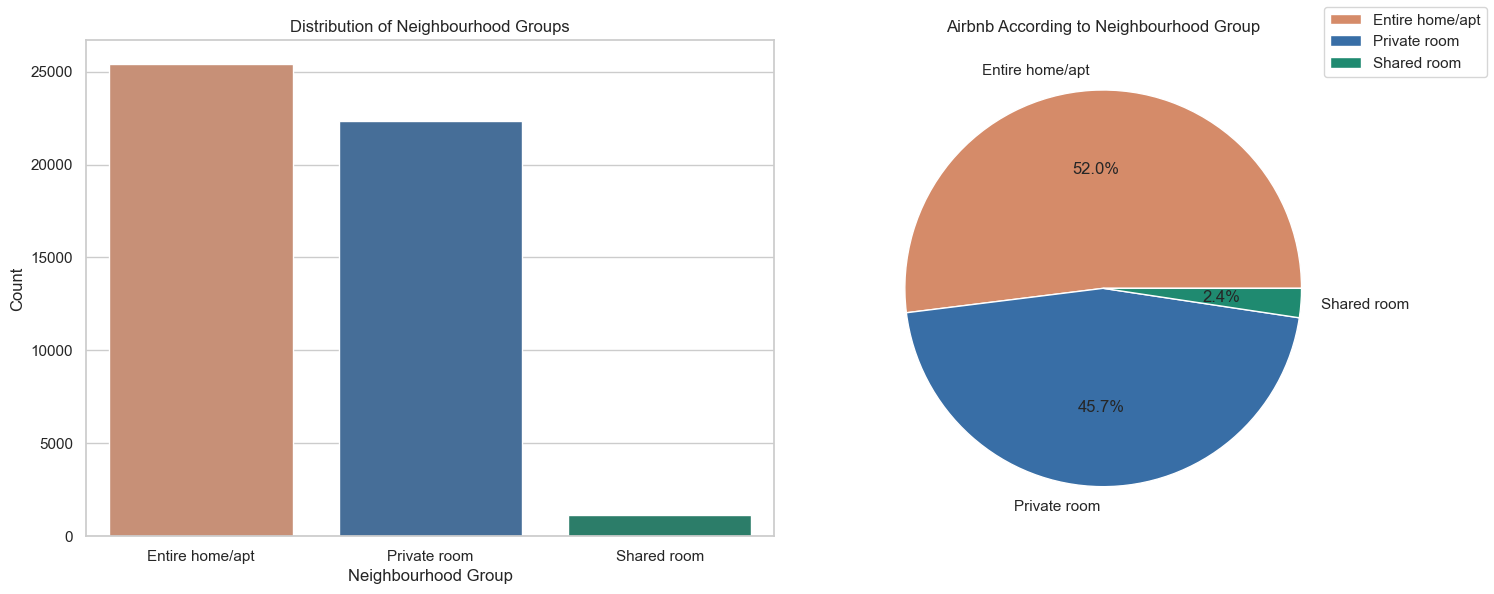

In [256]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

labels = bnb_df.room_type.value_counts().index
colors = ['#D58B69','#386EA6','#1F8A70']
explode = [0,0,0]
sizes = bnb_df.room_type.value_counts().values

sns.countplot(x='room_type', hue='room_type', order=labels, data=bnb_df, ax=ax1, palette=dict(zip(labels, colors)))
ax1.set_title('Distribution of Neighbourhood Groups')
ax1.set_xlabel('Neighbourhood Group')
ax1.set_ylabel('Count')

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
ax2.set_title('Airbnb According to Neighbourhood Group')

fig.legend()

plt.tight_layout()
plt.show()

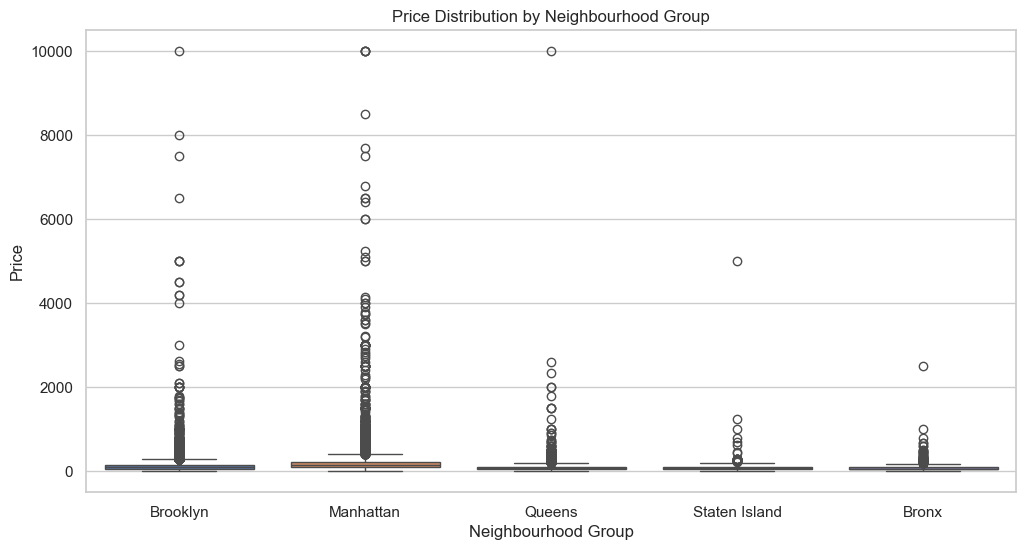

In [257]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=bnb_df, hue='neighbourhood_group')
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.show()

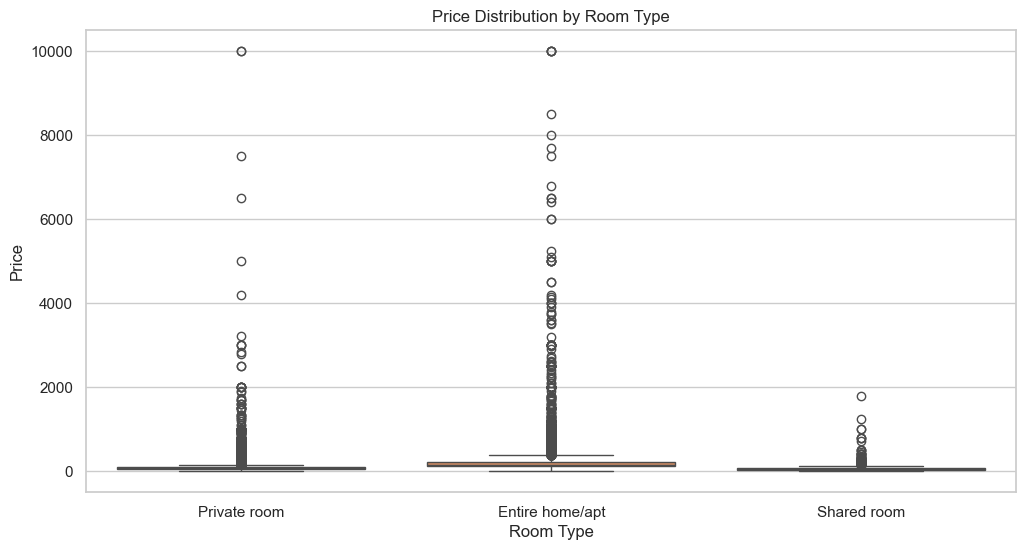

In [258]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=bnb_df, hue='room_type')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type') 
plt.ylabel('Price')
plt.show()

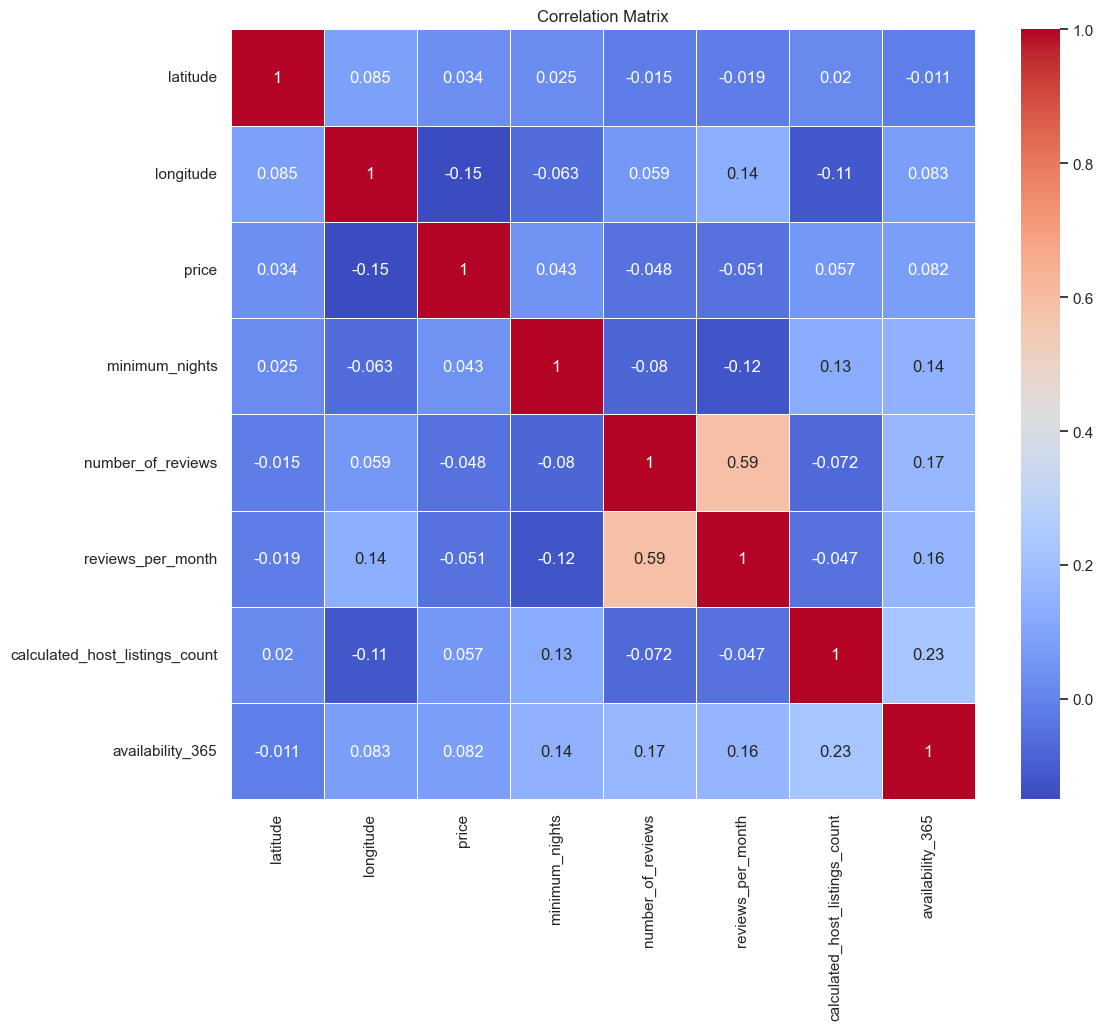

In [259]:
plt.figure(figsize=(12, 10))
corr_matrix = bnb_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


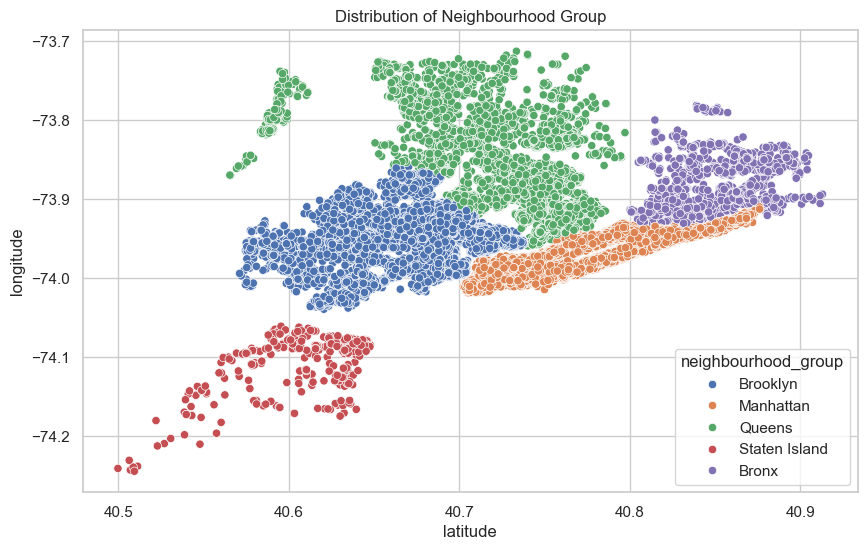

In [260]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='latitude', y='longitude', data= bnb_df, hue= 'neighbourhood_group')
plt.title('Distribution of Neighbourhood Group')

plt.show()

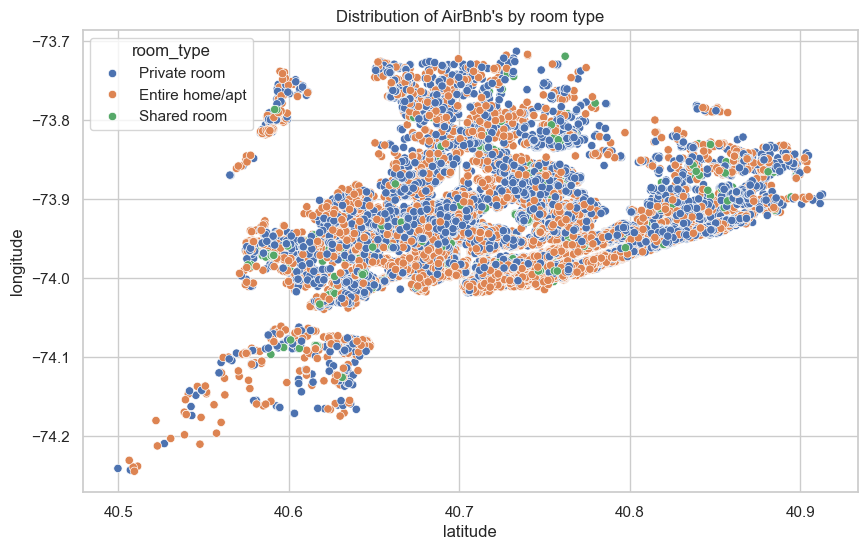

In [261]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='latitude', y='longitude', data= bnb_df, hue= 'room_type')
plt.title("Distribution of AirBnb's by room type")

plt.show()

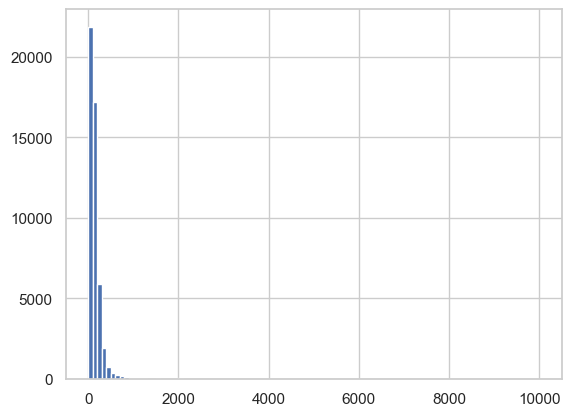

In [262]:
bnb_df['price'].hist(bins=100)
plt.show(block=True)

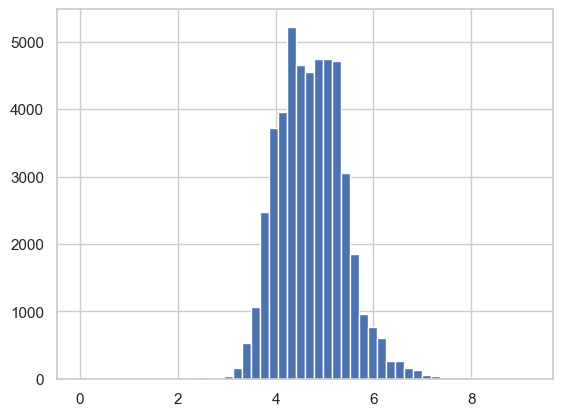

In [263]:
np.log1p(bnb_df['price']).hist(bins=50)
plt.show(block=True)

### Outlier Distribution

<Figure size 1000x600 with 0 Axes>

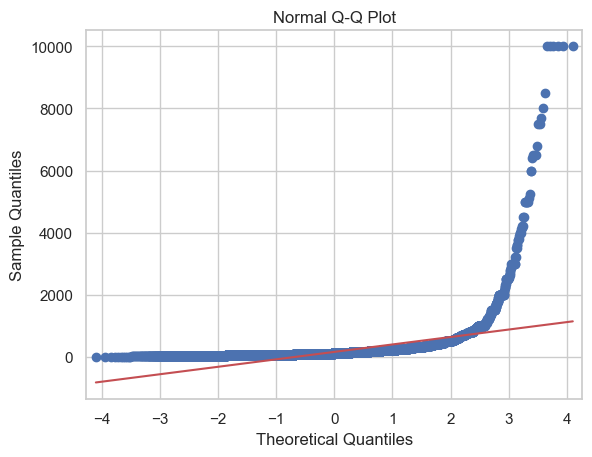

In [264]:
import statsmodels.api as sm

plt.figure(figsize=(10, 6))
sm.qqplot(bnb_df['price'], line='s')
plt.title('Normal Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


The plot shows significant deviation from the straight line (red), especially in the upper tail. The data points form a curve, indicating that the data does not follow a normal distribution. Moreover, the extreme deviation in the upper tail suggests that the data has heavy tails. This means there are more extreme values in the dataset than would be expected in a normal distribution. The sharp curve on the right side suggests that the data is positively skewed, as we have shown in the graph above.

<Figure size 1000x600 with 0 Axes>

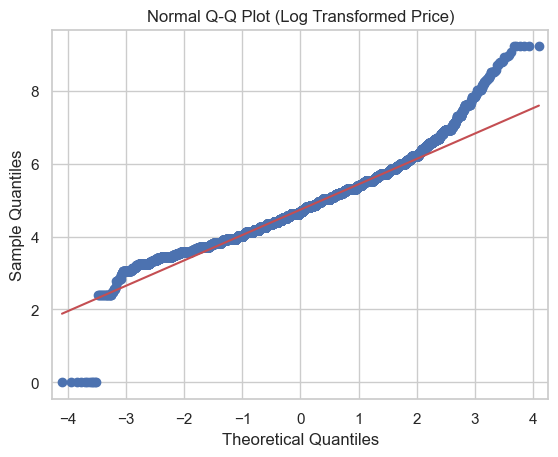

In [265]:
plt.figure(figsize=(10, 6))
sm.qqplot(np.log1p(bnb_df['price']), line='s')
plt.title('Normal Q-Q Plot (Log Transformed Price)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [266]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [267]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [268]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

# Feature Engeneering

In [269]:
# encoding the categorical variables
bnb_df = pd.get_dummies(bnb_df, columns=['neighbourhood_group', 'room_type'], drop_first=True)

In [270]:
bnb_df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,True,False,False,False,True,False
1,40.75362,-73.98377,225,1,45,0.38,2,355,False,True,False,False,False,False
2,40.80902,-73.94190,150,3,0,0.00,1,365,False,True,False,False,True,False
3,40.68514,-73.95976,89,1,270,4.64,1,194,True,False,False,False,False,False
4,40.79851,-73.94399,80,10,9,0.10,1,0,False,True,False,False,False,False


In [271]:
# transforms booleans into 0 and 1
for col in bnb_df.select_dtypes(include=['bool']).columns:
    bnb_df[col] = bnb_df[col].astype(int)

In [272]:
bnb_df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,1,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,355,0,1,0,0,0,0
2,40.80902,-73.94190,150,3,0,0.00,1,365,0,1,0,0,1,0
3,40.68514,-73.95976,89,1,270,4.64,1,194,1,0,0,0,0,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,1,0,0,0,0


# Model

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV

class RegressionModel:
    def __init__(self, model, name=None, scaled=False):
        self.model = model
        self.name = name
        self.scaled = scaled

    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)
        
    def __get_predictions(self, X_test):
        return self.model.predict(X_test)

    def get_metrics(self, X_test, y_test) -> pd.Series:
        y_pred = self.__get_predictions(X_test)
        mse = metrics.mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = metrics.mean_absolute_error(y_test, y_pred)
        r2 = metrics.r2_score(y_test, y_pred)
        metrics_series = pd.Series({
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R²': r2,
            'Name': self.name
        })
        return metrics_series

    def diagnostic_plots(self, X_test, y_test):
        y_pred = self.__get_predictions(X_test)
        residuals = y_test - y_pred
        std_residuals = residuals / np.std(residuals)
        leverage = self.__get_leverage(X_test)

        plt.figure(figsize=(10, 8))

        # Residuals vs Fitted
        plt.subplot(2, 2, 1)
        plt.scatter(y_pred, residuals, alpha=0.5)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel('Fitted values')
        plt.ylabel('Residuals')
        plt.title('Residuals vs Fitted')

        # Q-Q plot of residuals
        plt.subplot(2, 2, 2)
        stats.probplot(residuals, dist="norm", plot=plt)
        plt.title('Q-Q Residuals')

        # Scale-Location
        plt.subplot(2, 2, 3)
        plt.scatter(y_pred, np.sqrt(np.abs(std_residuals)), alpha=0.5)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel('Fitted values')
        plt.ylabel(r'$\sqrt{|Standardized residuals|}$')
        plt.title('Scale-Location')

        # Residuals vs Leverage
        plt.subplot(2, 2, 4)
        plt.scatter(leverage, std_residuals, alpha=0.5)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.axhline(y=-3, color='r', linestyle='--')
        plt.axhline(y=3, color='r', linestyle='--')
        plt.xlabel('Leverage')
        plt.ylabel('Standardized residuals')
        plt.title('Residuals vs Leverage')

        plt.tight_layout()
        plt.show()

    def __get_leverage(self, X):
        # Compute leverage values
        if hasattr(self.model, 'get_params') and 'fit_intercept' in self.model.get_params() and self.model.get_params()['fit_intercept']:
            X = np.column_stack((np.ones(X.shape[0]), X))
        hat_matrix = X @ np.linalg.pinv(X.T @ X) @ X.T
        leverage = np.diag(hat_matrix)
        return leverage

    def cross_validate(self, X, y, cv):

        kf = KFold(n_splits=cv, shuffle=True, random_state=42)
        mse_scores = cross_val_score(self.model, X, y, scoring='neg_mean_squared_error', cv=kf)
        rmse_scores = np.sqrt(-mse_scores)
        mae_scores = cross_val_score(self.model, X, y, scoring='neg_mean_absolute_error', cv=kf)
        r2_scores = cross_val_score(self.model, X, y, scoring='r2', cv=kf)

        metrics_series = pd.Series({
            'MSE': -np.mean(mse_scores),
            'RMSE': np.mean(rmse_scores),
            'MAE': -np.mean(mae_scores),
            'R²': np.mean(r2_scores),
            'Name': self.name if self.name else type(self.model).__name__
        })
        return metrics_series

In [276]:
bnb_df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,1,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,355,0,1,0,0,0,0
2,40.80902,-73.94190,150,3,0,0.00,1,365,0,1,0,0,1,0
3,40.68514,-73.95976,89,1,270,4.64,1,194,1,0,0,0,0,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,0.00,2,9,1,0,0,0,1,0
48891,40.70184,-73.93317,40,4,0,0.00,2,36,1,0,0,0,1,0
48892,40.81475,-73.94867,115,10,0,0.00,1,27,0,1,0,0,0,0
48893,40.75751,-73.99112,55,1,0,0.00,6,2,0,1,0,0,0,1


In [316]:
X = bnb_df.drop(['price'],axis=1)
y = bnb_df['price']

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [329]:
lr_model = RegressionModel(LinearRegression(), name= 'Linear Regression')

In [331]:
lr_model.fit(X_train, y_train)

In [332]:
print(lr_model.get_metrics(X_test, y_test))

MSE          38885.049156
RMSE           197.192924
MAE             70.790563
R²               0.121008
Name    Linear Regression
dtype: object


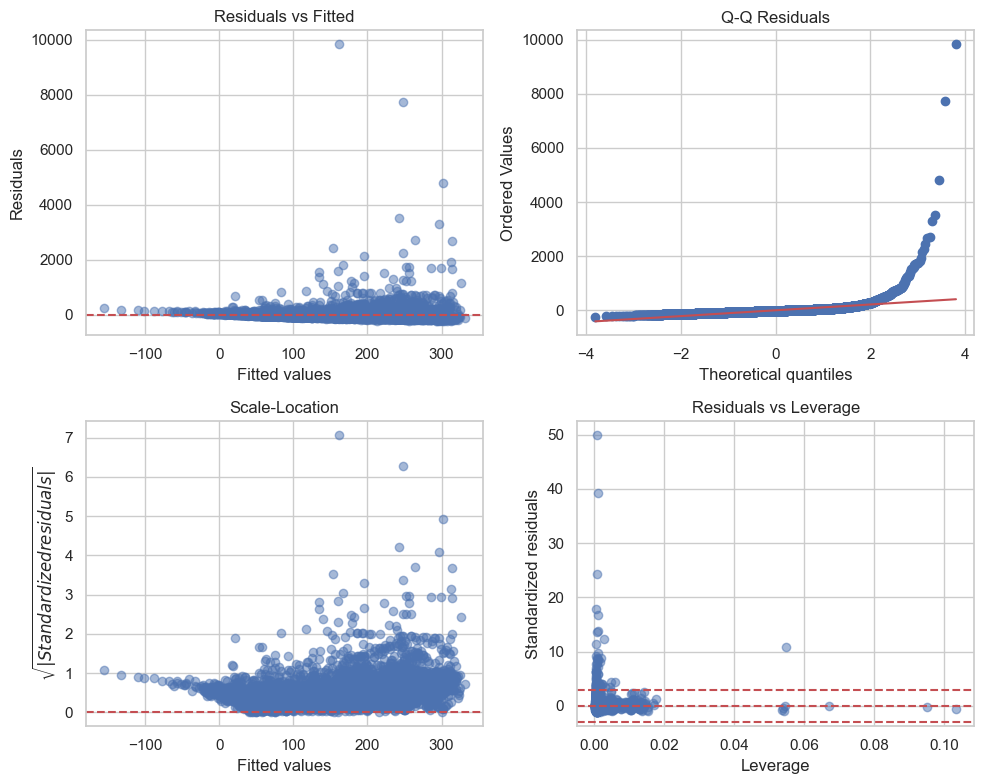

In [333]:
lr_model.diagnostic_plots(X_test, y_test)

In [313]:
lr_model.cross_validate(X_train, y_train, 10)

MSE          55313.580172
RMSE           233.767567
MAE             75.346611
R²               0.096683
Name    Linear Regression
dtype: object

In [300]:
rf_model = RegressionModel(RandomForestRegressor(n_estimators=100, random_state=42), name='Random Forest Regressor')

In [301]:
rf_model.fit(X_train, y_train)

In [302]:
rf_model.get_metrics(X_test, y_test)

MSE                41086.381468
RMSE                 202.697759
MAE                   64.341725
R²                     0.071247
Name    Random Forest Regressor
dtype: object

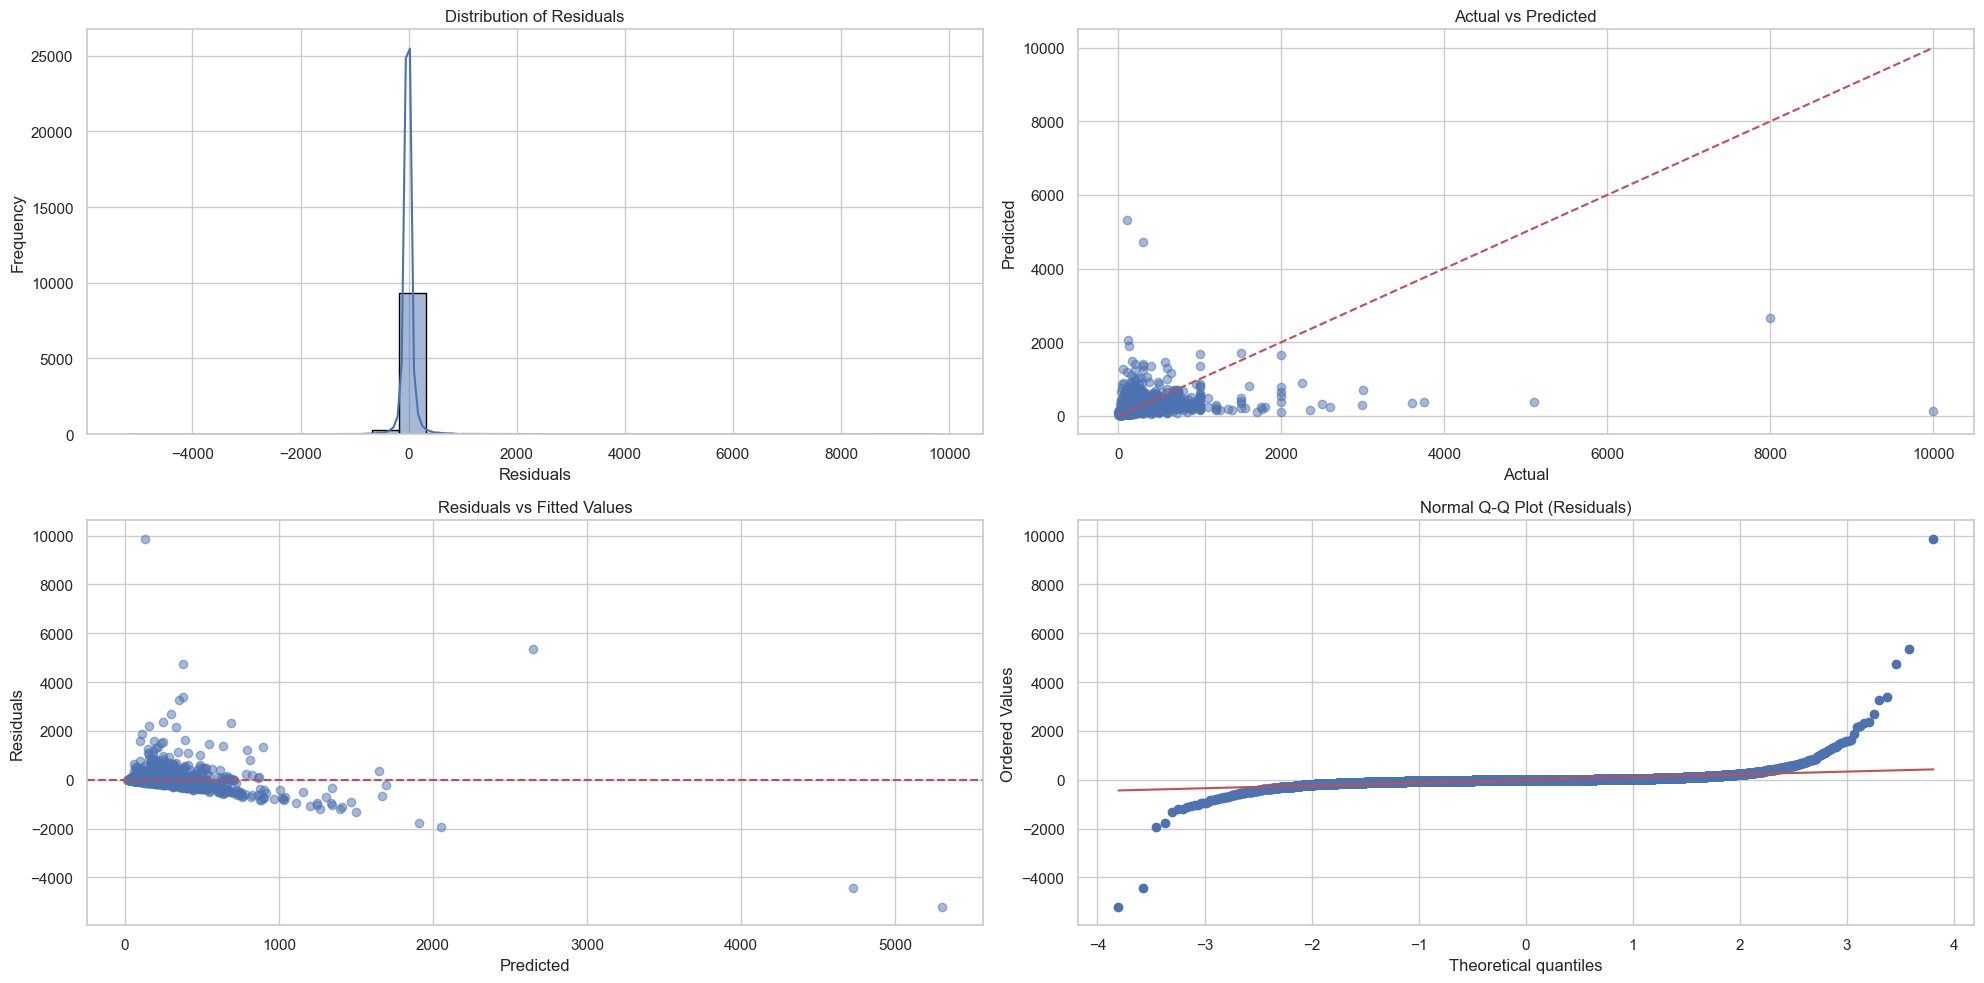

In [303]:
rf_model.visualize_metrics(X_test, y_test)